In [377]:
# 分析に使うImport群
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [378]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv', header=None)


In [379]:
train['year'] = train['datetime'].apply(lambda x : x.split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split('-')[2])

test['year'] = test['datetime'].apply(lambda x : x.split('-')[0])
test['month'] = test['datetime'].apply(lambda x : x.split('-')[1])
test['day'] = test['datetime'].apply(lambda x : x.split('-')[2])


In [388]:
train['fun'] = train['remarks'].apply(lambda x: 1 if x == 'お楽しみメニュー' else 0)
test['fun'] = test['remarks'].apply(lambda x: 1 if x == 'お楽しみメニュー' else 0)

#train['clear sky'] = train['weather'].apply(lambda x: 1 if x in['快晴', '晴れ', '薄曇'] else 0)
#test['clear sky'] = test['weather'].apply(lambda x: 1 if x in['快晴', '晴れ', '薄曇'] else 0)
train['clear sky'] = train['weather'].apply(lambda x: 1 if x in['快晴'] else 0)
test['clear sky'] = test['weather'].apply(lambda x: 1 if x in['快晴'] else 0)

train_dummy1 = pd.get_dummies(train[['weather', 'week']], drop_first=True, prefix='', prefix_sep='')
test_dummy1 = pd.get_dummies(test[['weather', 'week']], drop_first=True, prefix='', prefix_sep='')

train = pd.concat([train, train_dummy1], axis=1)
test = pd.concat([test, test_dummy1], axis=1)



In [389]:
#trainX = train[['year', 'month', 'fun', 'temperature']]
#testX = test[['year', 'month', 'fun', 'temperature']]
trainX = train[['year', 'month', 'day', 'fun', 'temperature', 'clear sky']]
testX = test[['year', 'month', 'day', 'fun', 'temperature', 'clear sky']]

Y = train['y']

In [390]:
model_linear = LinearRegression()
model_linear.fit(trainX, Y)
pred = model_linear.predict(trainX)


In [391]:
pred

array([128.86450053, 131.20115337, 132.19901779, 131.96107753,
       130.48733259, 132.53342794, 126.44605983, 131.33666135,
       127.70025821, 130.77844152, 138.61069201, 137.96081685,
       139.96787411, 136.97001772, 135.29030532, 141.7647008 ,
       143.27748384, 138.71422718, 134.68653355, 132.49190254,
       133.52880506, 135.63884604, 138.18146633, 138.66441213,
       136.46978112, 128.94770617, 132.00524507, 134.32125349,
       113.67100293, 112.6915322 , 111.01181981, 114.29597056,
       113.52953256, 115.96916912, 109.05793122, 107.68717   ,
       109.52729791, 102.82202746, 105.36464774, 103.68493535,
       101.49030433, 104.99881623,  96.72814551,  98.54987973,
        94.9958159 ,  93.54271536, 103.96088735, 115.8750265 ,
       114.00999107, 114.36930874, 112.4836289 , 108.47432896,
       108.92530195, 108.2754268 , 113.08368901, 100.73270744,
       105.12903475, 104.0672247 , 105.47702402,  99.59562336,
       102.05365361,  95.34838316,  95.91366828,  98.45

In [392]:
train['pred'] = pred

In [393]:
train['res'] = train['y'] - train['pred']

In [394]:
train.sort_values(by='res')

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,day,fun,clear sky,pred,res
27,2013-12-26,80,木,0,酢豚,NaN,NaN,NaN,NaN,曇,--,7.3,2013,12,26,0,0,134.321253,-54.321253
103,2014-4-25,80,金,0,中華丼,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,20.8,2014,4,25,1,0,122.446384,-42.446384
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,0,1,128.864501,-38.864501
107,2014-5-2,47,金,0,鶏の天ぷら,420.0,NaN,NaN,NaN,晴れ,--,23.3,2014,5,2,0,0,81.337699,-34.337699
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,27,0,0,89.256828,-34.256828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2014-4-1,125,火,1,メンチカツ,377.0,NaN,NaN,NaN,薄曇,--,16.1,2014,4,1,0,0,94.482513,30.517487
13,2013-12-5,171,木,0,鶏のカッシュナッツ炒め,NaN,NaN,NaN,NaN,快晴,--,13.8,2013,12,5,0,1,136.970018,34.029982
46,2014-2-3,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,NaN,晴れ,--,15.9,2014,2,3,0,0,103.960887,35.039113
55,2014-2-17,137,月,1,チンジャオロース,416.0,NaN,NaN,NaN,晴れ,--,11.6,2014,2,17,0,0,100.732707,36.267293


In [395]:
train['res'].std()
# 17.33389004831175 標準
# 16.680551033352128 + 天候, 日(快晴のみ)

16.680551033352128

In [299]:
weather_categories = set(train['weather'].unique().tolist() + test['weather'].unique().tolist())
remarks_categories = set(train['remarks'].unique().tolist() + test['remarks'].unique().tolist())

train['weather'] = pd.Categorical(train['weather'], categories=weather_categories)
test['weather'] = pd.Categorical(test['weather'], categories=weather_categories)

remarks_categories

train['remarks'] = pd.Categorical(train['remarks'], categories=remarks_categories)
test['remarks'] = pd.Categorical(test['remarks'], categories=remarks_categories)

In [300]:
remarks_categories

{'none',
 'お楽しみメニュー',
 'スペシャルメニュー（800円）',
 '手作りの味',
 '料理長のこだわりメニュー',
 '近隣に飲食店複合ビルオープン',
 '酢豚（28食）、カレー（85食）',
 '鶏のレモンペッパー焼（50食）、カレー（42食）'}

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   datetime       207 non-null    object  
 1   y              207 non-null    int64   
 2   week           207 non-null    object  
 3   soldout        207 non-null    int64   
 4   name           207 non-null    object  
 5   kcal           166 non-null    float64 
 6   remarks        207 non-null    category
 7   event          14 non-null     object  
 8   payday         10 non-null     float64 
 9   weather        207 non-null    category
 10  precipitation  207 non-null    object  
 11  temperature    207 non-null    float64 
dtypes: category(2), float64(3), int64(2), object(5)
memory usage: 17.4+ KB


In [302]:
train.isnull().any()

datetime         False
y                False
week             False
soldout          False
name             False
kcal              True
remarks          False
event             True
payday            True
weather          False
precipitation    False
temperature      False
dtype: bool

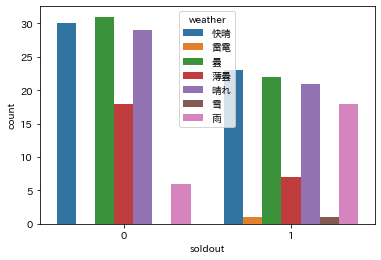

In [303]:
sns.countplot('soldout', data=train, hue='weather')

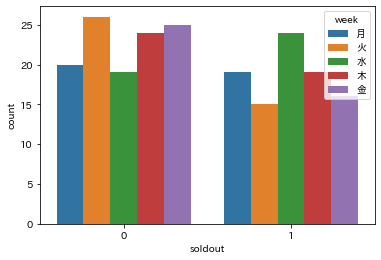

In [304]:
sns.countplot('soldout', data=train, hue='week')

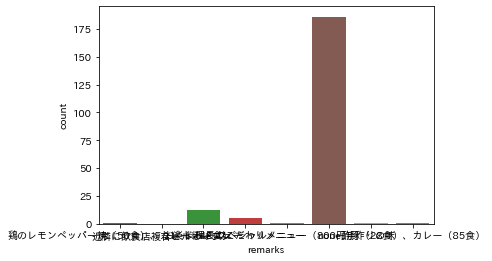

In [305]:
sns.countplot('remarks', data=train)

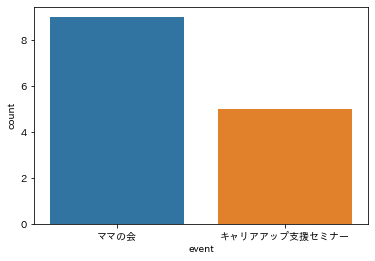

In [306]:
sns.countplot('event', data=train)

In [307]:
train.groupby('name').count()['y']

name
いか天ぷら           1
かじきの甘辛煮         1
きのこソースハンバーグ     1
さっくりメンチカツ       1
さわら焼味噌掛け        1
               ..
鶏の親子煮           1
鶏チリソース          2
鶏肉とカシューナッツ炒め    1
鶏肉のカレー唐揚        1
鶏肉の山賊焼き         1
Name: y, Length: 156, dtype: int64

In [308]:
train['kcal'].value_counts()

430.0    9
400.0    8
415.0    6
426.0    5
410.0    5
        ..
368.0    1
403.0    1
406.0    1
416.0    1
394.0    1
Name: kcal, Length: 77, dtype: int64

In [309]:
train['event'].value_counts()

ママの会             9
キャリアアップ支援セミナー    5
Name: event, dtype: int64

In [310]:
dummy = pd.get_dummies(train[['event', 'y']])

In [311]:
dummy.corr()

,y,event_キャリアアップ支援セミナー,event_ママの会
y,1.000000,-0.052869,-0.019216
event_キャリアアップ支援セミナー,-0.052869,1.000000,-0.033543
event_ママの会,-0.019216,-0.033543,1.000000


In [312]:
train['remarks'].value_counts()

none                        186
お楽しみメニュー                     12
料理長のこだわりメニュー                  5
酢豚（28食）、カレー（85食）              1
手作りの味                         1
スペシャルメニュー（800円）               1
鶏のレモンペッパー焼（50食）、カレー（42食）      1
近隣に飲食店複合ビルオープン                0
Name: remarks, dtype: int64

In [314]:
dummy = pd.get_dummies(train[['remarks', 'y']])
#sns.pairplot(dummy)

In [315]:
dummy.corr()

,y,remarks_鶏のレモンペッパー焼（50食）、カレー（42食）,remarks_近隣に飲食店複合ビルオープン,remarks_お楽しみメニュー,remarks_料理長のこだわりメニュー,remarks_スペシャルメニュー（800円）,remarks_none,remarks_手作りの味,remarks_酢豚（28食）、カレー（85食）
y,1.000000,0.011420,NaN,0.167332,-0.147834,-0.088408,-0.040443,-0.039556,0.056024
remarks_鶏のレモンペッパー焼（50食）、カレー（42食）,0.011420,1.000000,NaN,-0.017284,-0.010962,-0.004854,-0.207354,-0.004854,-0.004854
remarks_近隣に飲食店複合ビルオープン,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remarks_お楽しみメニュー,0.167332,-0.017284,NaN,1.000000,-0.039029,-0.017284,-0.738278,-0.017284,-0.017284
remarks_料理長のこだわりメニュー,-0.147834,-0.010962,NaN,-0.039029,1.000000,-0.010962,-0.468227,-0.010962,-0.010962
remarks_スペシャルメニュー（800円）,-0.088408,-0.004854,NaN,-0.017284,-0.010962,1.000000,-0.207354,-0.004854,-0.004854
remarks_none,-0.040443,-0.207354,NaN,-0.738278,-0.468227,-0.207354,1.000000,-0.207354,-0.207354
remarks_手作りの味,-0.039556,-0.004854,NaN,-0.017284,-0.010962,-0.004854,-0.207354,1.000000,-0.004854
remarks_酢豚（28食）、カレー（85食）,0.056024,-0.004854,NaN,-0.017284,-0.010962,-0.004854,-0.207354,-0.004854,1.000000


In [232]:
train['payday'].value_counts()

1.0    10
Name: payday, dtype: int64

In [282]:
train['payday'] = train['payday'].fillna(0)

In [233]:
train['precipitation'].value_counts()

--     169
0       23
0.5      9
1.5      2
6.5      1
1        1
6        1
2.5      1
Name: precipitation, dtype: int64

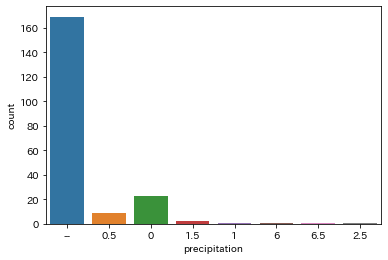

In [234]:
sns.countplot('precipitation', data=train)

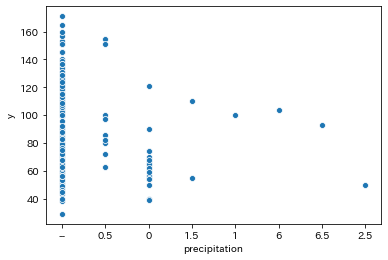

In [317]:
sns.scatterplot(x='precipitation', y='y', data=train)

In [276]:
dummy = pd.get_dummies(train[['weather', 'y']])

In [283]:
dummy.corr()

,y,weather_快晴,weather_雷電,weather_曇,weather_薄曇,weather_晴れ,weather_雪,weather_雨
y,1.000000,0.298620,-0.069292,-0.010470,-0.136748,-0.131491,-0.001324,-0.062540
weather_快晴,0.298620,1.000000,-0.040874,-0.344156,-0.217426,-0.331065,-0.040874,-0.212450
weather_雷電,-0.069292,-0.040874,1.000000,-0.040874,-0.025823,-0.039319,-0.004854,-0.025232
weather_曇,-0.010470,-0.344156,-0.040874,1.000000,-0.217426,-0.331065,-0.040874,-0.212450
weather_薄曇,-0.136748,-0.217426,-0.025823,-0.217426,1.000000,-0.209156,-0.025823,-0.134219
weather_晴れ,-0.131491,-0.331065,-0.039319,-0.331065,-0.209156,1.000000,-0.039319,-0.204369
weather_雪,-0.001324,-0.040874,-0.004854,-0.040874,-0.025823,-0.039319,1.000000,-0.025232
weather_雨,-0.062540,-0.212450,-0.025232,-0.212450,-0.134219,-0.204369,-0.025232,1.000000


In [293]:
def weather_check(weather):
    if weather == '快晴':
        return 0
    elif weather in ['晴れ', '薄曇']:
        return 1
    else:
        return 2

In [294]:
train['weather_level'] = train['weather'].apply(weather_check)

In [295]:
train.corr()

,y,soldout,kcal,payday,temperature,weather_level
y,1.000000,0.098308,0.147269,0.046546,-0.655332,-0.202659
soldout,0.098308,1.000000,0.048633,-0.158202,-0.156752,0.090134
kcal,0.147269,0.048633,1.000000,0.066765,-0.046191,0.037163
payday,0.046546,-0.158202,0.066765,1.000000,-0.025759,0.135533
temperature,-0.655332,-0.156752,-0.046191,-0.025759,1.000000,0.085388
weather_level,-0.202659,0.090134,0.037163,0.135533,0.085388,1.000000


In [236]:
'''
■trainX に入れる内容■
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64

week(dummies), soldout, remarks(dummies w/nan), event(dummies w/nan), payday(Nan replace), weather(dummies), precipitation(-- replace), temperature
'''
X = DataFrame()

In [237]:
train_dummies = pd.get_dummies(train[['weather', 'week']], drop_first=True, prefix='', prefix_sep='')

In [238]:
train_dummies

,雷電,曇,薄曇,晴れ,雪,雨,木,水,火,金
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
202,0,1,0,0,0,0,0,1,0,0
203,0,1,0,0,0,0,1,0,0,0
204,0,0,0,1,0,0,0,0,0,1
205,0,0,0,0,0,0,0,0,0,0


In [239]:
train_dummies2 = pd.get_dummies(train[['remarks', 'event']], drop_first=True, dummy_na=True)

In [240]:
train_dummies2

,remarks_近隣に飲食店複合ビルオープン,remarks_お楽しみメニュー,remarks_料理長のこだわりメニュー,remarks_スペシャルメニュー（800円）,remarks_none,remarks_手作りの味,remarks_酢豚（28食）、カレー（85食）,remarks_nan,event_ママの会,event_nan
0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
202,0,0,0,0,1,0,0,0,0,1
203,0,0,0,0,1,0,0,0,0,1
204,0,0,0,1,0,0,0,0,0,0
205,0,0,0,0,1,0,0,0,0,1


In [241]:
payday_fillna = train['payday'].fillna(0)

In [242]:
precipitation_replaced = train['precipitation'].apply(lambda x : 0 if x == '--' else x)

In [244]:
X = pd.concat([train_dummies, train_dummies2, payday_fillna, precipitation_replaced, train['year'], train['month'], train['day'], train['soldout']], axis=1)

In [245]:
X.head()

,雷電,曇,薄曇,晴れ,雪,雨,木,水,火,金,...,remarks_酢豚（28食）、カレー（85食）,remarks_nan,event_ママの会,event_nan,payday,precipitation,year,month,day,soldout
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.0,0,2013,11,18,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0.0,0,2013,11,19,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0.0,0,2013,11,20,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0.0,0,2013,11,21,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0.0,0,2013,11,22,1


In [246]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   雷電                        207 non-null    uint8  
 1   曇                         207 non-null    uint8  
 2   薄曇                        207 non-null    uint8  
 3   晴れ                        207 non-null    uint8  
 4   雪                         207 non-null    uint8  
 5   雨                         207 non-null    uint8  
 6   木                         207 non-null    uint8  
 7   水                         207 non-null    uint8  
 8   火                         207 non-null    uint8  
 9   金                         207 non-null    uint8  
 10  remarks_近隣に飲食店複合ビルオープン    207 non-null    uint8  
 11  remarks_お楽しみメニュー          207 non-null    uint8  
 12  remarks_料理長のこだわりメニュー      207 non-null    uint8  
 13  remarks_スペシャルメニュー（800円）   207 non-null    uint8  
 14  remarks_no

In [247]:
trainX, testX, trainY, testY = train_test_split(X, train['y'], test_size=0.3, random_state=3)

In [248]:
linear_model = LinearRegression()

In [249]:
linear_model.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [250]:
predict = linear_model.predict(testX)

In [251]:
predict

array([ 43.85341064,  71.0308832 ,  66.47971415,  46.07121771,
        56.00970402, 108.72447834,  61.16354915, 101.74753906,
       125.97388156,  97.78836626,  98.07305926,  32.93662967,
        80.58486068,  72.33328195, 111.54241629,  44.37657468,
       100.94942563, 110.61106063,  50.34319613,  73.20100988,
        49.73514452, 119.7760195 , 100.25609772, 127.81969904,
        98.50203991, 113.57223229, 119.40991974, 118.69289972,
       138.16390968,  80.57522591, 117.38188173, 133.49646641,
       109.19615405,  85.12682478,  92.83231008,  28.9647648 ,
       115.59648368,  95.47413123, 122.48499014,  47.1652559 ,
        74.46958882, 109.27012392,  59.72202388, 114.64002744,
        30.47392927,  48.9803521 , 146.17500084,  79.11493676,
        77.63308078,  38.89299163,  58.71298996, 113.78798967,
        96.51978732, 101.0681915 ,  77.08666709,  67.98673348,
       127.63874182,  52.55074371,  89.46025383, 134.67795388,
       110.79875548,  98.6463507 ,  78.95573422])

In [252]:
linear_model.score(testX, testY)

0.7140044405140058

In [253]:
linear_model.score(trainX, trainY)

0.7809525012462304

In [254]:
# 提出用データを作成する

In [255]:
test.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,none,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,none,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,none,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,none,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,none,NaN,NaN,晴れ,--,22.1


In [256]:
sample.head()

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


In [257]:
testX = DataFrame()


#test_dummies = pd.get_dummies(test[['weather', 'week']], drop_first=True, prefix='', prefix_sep='')
#test_dummies2 = pd.get_dummies(test[['remarks', 'event']], drop_first=True, dummy_na=True)
payday_fillna = test['payday'].fillna(0)
precipitation_replaced = test['precipitation'].apply(lambda x : 0 if x == '--' else x)
test['year'] = test['datetime'].apply(lambda x : x.split('-')[0])
test['month'] = test['datetime'].apply(lambda x : x.split('-')[1])
test['day'] = test['datetime'].apply(lambda x : x.split('-')[2])
testX = pd.concat([test_dummies, test_dummies2, payday_fillna, precipitation_replaced, test['year'], test['month'], test['day'], test['soldout']], axis=1)

testX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   雷電                        40 non-null     uint8  
 1   曇                         40 non-null     uint8  
 2   薄曇                        40 non-null     uint8  
 3   晴れ                        40 non-null     uint8  
 4   雪                         40 non-null     uint8  
 5   雨                         40 non-null     uint8  
 6   木                         40 non-null     uint8  
 7   水                         40 non-null     uint8  
 8   火                         40 non-null     uint8  
 9   金                         40 non-null     uint8  
 10  remarks_近隣に飲食店複合ビルオープン    40 non-null     uint8  
 11  remarks_お楽しみメニュー          40 non-null     uint8  
 12  remarks_料理長のこだわりメニュー      40 non-null     uint8  
 13  remarks_スペシャルメニュー（800円）   40 non-null     uint8  
 14  remarks_none

In [261]:
predict = linear_model.predict(testX)

In [262]:
sample[1] = predict

In [263]:
sample.to_csv('submit6.csv', index=None, header=None)